In [35]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
data = '''1163751742
1381373672
2136511328
3694931569
7463417111
1319128137
1359912421
3125421639
1293138521
2311944581'''

In [83]:
maze = np.matrix([ list(x) for x in data.split('\n') ], dtype=int)
start = (0,0)
end = (maze.shape[0]-1,maze.shape[1]-1)

In [86]:
def neighbors(im, i, j):
    return list(set([
        (max(i-1,0),j), # T
        (i,min(j+1,im.shape[1])), # R
        (min(i+1,im.shape[0]),j), # B
        (i,max(j-1,0)), # L
    ]) - set([(i,j)]))

class Node():
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position
        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

def astar(maze, start, end):
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    open_list = []
    closed_list = []
    
    open_list.append(start)
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)
    

In [70]:
def neighbors(im, i, j):
    return list(set([
        (max(i-1,0),j), # T
        (i,min(j+1,im.shape[1])), # R
        (min(i+1,im.shape[0]),j), # B
        (i,max(j-1,0)), # L
    ]) - set([(i,j)]))

arrs = []
height = marr.shape[0]
width = marr.shape[1]
for i in range(height):
    for j in range(width):
        #v = marr[i,j]
        n = neighbors(marr, x, y)
        row = []
        for x in range(width*height):
            pass
        print(list(neighbors(marr, x, y)))

0 0
[(0, 1), (1, 0)]
0 1
[(0, 2), (0, 0), (1, 1)]
0 2
[(1, 2), (0, 3), (0, 1)]
0 3
[(1, 3), (0, 2), (0, 4)]
0 4
[(0, 3), (0, 5), (1, 4)]
0 5
[(0, 6), (1, 5), (0, 4)]
0 6
[(0, 5), (1, 6), (0, 7)]
0 7
[(0, 6), (0, 8), (1, 7)]
0 8
[(0, 9), (1, 8), (0, 7)]
0 9
[(0, 10), (0, 8), (1, 9)]
1 0
[(2, 0), (0, 0), (1, 1)]
1 1
[(0, 1), (1, 0), (2, 1), (1, 2)]
1 2
[(0, 2), (1, 3), (1, 1), (2, 2)]
1 3
[(1, 2), (0, 3), (2, 3), (1, 4)]
1 4
[(1, 5), (1, 3), (2, 4), (0, 4)]
1 5
[(2, 5), (0, 5), (1, 6), (1, 4)]
1 6
[(1, 5), (2, 6), (1, 7), (0, 6)]
1 7
[(2, 7), (1, 8), (1, 6), (0, 7)]
1 8
[(2, 8), (0, 8), (1, 9), (1, 7)]
1 9
[(0, 9), (1, 10), (1, 8), (2, 9)]
2 0
[(3, 0), (1, 0), (2, 1)]
2 1
[(2, 0), (3, 1), (1, 1), (2, 2)]
2 2
[(1, 2), (3, 2), (2, 3), (2, 1)]
2 3
[(3, 3), (1, 3), (2, 4), (2, 2)]
2 4
[(2, 5), (3, 4), (1, 4), (2, 3)]
2 5
[(1, 5), (2, 6), (2, 4), (3, 5)]
2 6
[(2, 7), (2, 5), (1, 6), (3, 6)]
2 7
[(2, 8), (2, 6), (3, 7), (1, 7)]
2 8
[(3, 8), (1, 8), (2, 7), (2, 9)]
2 9
[(2, 8), (3, 9), (1, 9), 

In [34]:
nx.algorithms.shortest_paths.generic.shortest_path(G, source=0, target=10)

NodeNotFound: Either source 0 or target 10 is not in G

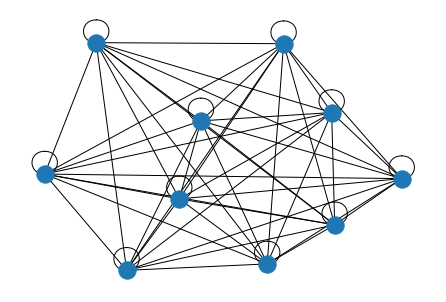

In [36]:
nx.draw(G)